In [20]:
import numpy as np
import pandas as pd
import sklearn
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.pylab import rcParams


In [3]:
df = pd.read_csv('data/factors_2002.csv', parse_dates=['DATE'])
df[df.columns[2:]] = df[df.columns[2:]].astype('float32')

df = df.sort_values(by=['DATE', 'permno'], ascending=True)
df.head()

,permno,DATE,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,macro_dp,macro_ep,macro_bm,macro_ntis,macro_tbl,macro_tms,macro_dfy,macro_svar,Date,macro_mkt-rf
0,10001,2002-01-31,29380.699219,0.024547,0.000603,-0.246853,9.020208,0.029936,-0.032968,6.956505e-03,...,4.274154,3.823618,0.132561,0.011191,0.0165,-0.0027,0.0132,0.002184,200202.0,-1.44
1,10002,2002-01-31,84361.703125,0.149783,0.022435,-0.356072,8.509161,0.058969,0.290509,3.427267e-08,...,4.274154,3.823618,0.132561,0.011191,0.0165,-0.0027,0.0132,0.002184,200202.0,-1.44
2,10012,2002-01-31,65282.878906,2.408649,5.801589,-0.285714,9.949011,0.138741,-0.123827,4.471088e-01,...,4.274154,3.823618,0.132561,0.011191,0.0165,-0.0027,0.0132,0.002184,200202.0,-1.44
3,10019,2002-01-31,10352.500000,1.991428,3.965783,0.214286,7.429473,0.159603,0.039784,4.471088e-01,...,4.274154,3.823618,0.132561,0.011191,0.0165,-0.0027,0.0132,0.002184,200202.0,-1.44
4,10025,2002-01-31,186744.234375,0.138594,0.019208,-0.112840,10.115205,0.070544,0.083402,6.441576e-02,...,4.274154,3.823618,0.132561,0.011191,0.0165,-0.0027,0.0132,0.002184,200202.0,-1.44


In [5]:
df2 = df[~(df['DATE'] > '2020-12-31')]
print('Number of months: ', df2['DATE'].nunique())
print('START: ', df2['DATE'].min())
print('End: ', df2['DATE'].max())

Number of months:  228
START:  2002-01-31 00:00:00
End:  2020-12-31 00:00:00


In [8]:
print('Number of unique stocks: ', df2['permno'].nunique())

Number of unique stocks:  14666


In [9]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1387320 entries, 0 to 1387319
Data columns (total 87 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   permno           1387320 non-null  int64         
 1   DATE             1387320 non-null  datetime64[ns]
 2   mvel1            1387320 non-null  float32       
 3   beta             1387320 non-null  float32       
 4   betasq           1387320 non-null  float32       
 5   chmom            1387320 non-null  float32       
 6   dolvol           1387320 non-null  float32       
 7   idiovol          1387320 non-null  float32       
 8   indmom           1387320 non-null  float32       
 9   mom1m            1387320 non-null  float32       
 10  mom6m            1387320 non-null  float32       
 11  mom12m           1387320 non-null  float32       
 12  mom36m           1387320 non-null  float32       
 13  pricedelay       1387320 non-null  float32       
 14  turn   

Minimum number of stocks per month:  5445
Maximum number of stocks per month:  7370
Mean number of stocks pre month:  6084.736842105263


<Axes: xlabel='DATE'>

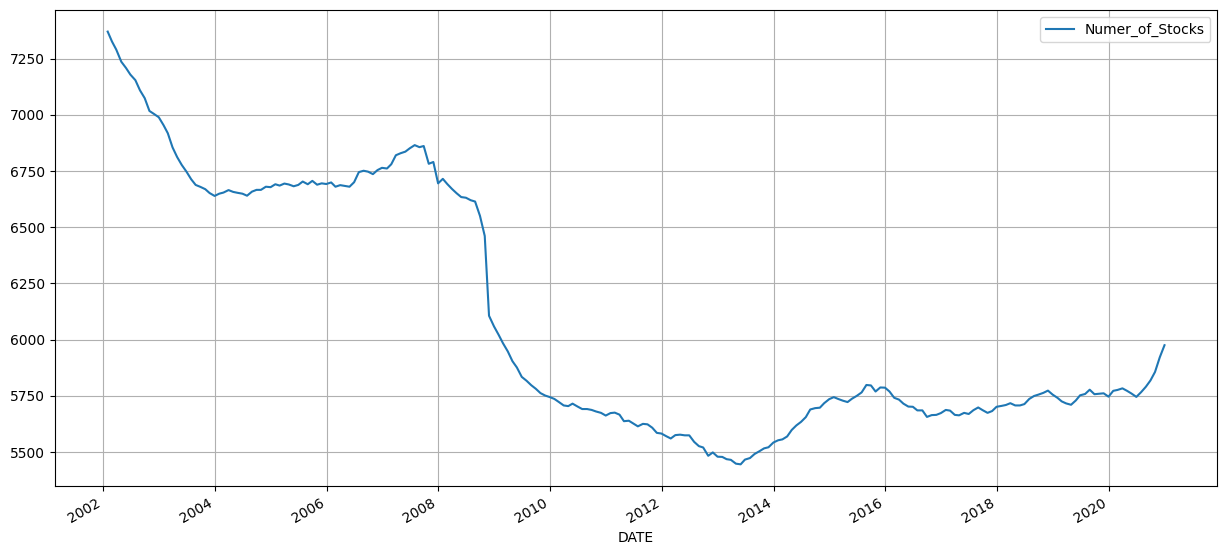

In [13]:
Number_stocks_per_month = Counter(df2['DATE'])
Number_stocks_per_month = pd.DataFrame(Number_stocks_per_month.items(), columns=['DATE', 'Numer_of_Stocks'])
print('Minimum number of stocks per month: ', Number_stocks_per_month['Numer_of_Stocks'].min())
print('Maximum number of stocks per month: ', Number_stocks_per_month['Numer_of_Stocks'].max())
print('Mean number of stocks pre month: ', Number_stocks_per_month['Numer_of_Stocks'].mean())
Number_stocks_per_month.plot(x='DATE', y='Numer_of_Stocks', grid=True, figsize=(15, 7) )


In [ ]:
features = df.columns[~df.columns.isin(['permno', 'Date'])]
desc_stats = df2[features]
desc_stats = df2[features].describe()
desc_stats

,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,mom6m,mom12m,...,risk_premium,macro_dp,macro_ep,macro_bm,macro_ntis,macro_tbl,macro_tms,macro_dfy,macro_svar,macro_mkt-rf
count,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,...,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06,1.387320e+06
mean,2.874504e+06,1.029264e+00,1.456118e+00,1.646077e-03,1.269688e+01,5.547357e-02,1.008615e-01,7.120099e-03,3.597109e-02,8.227823e-02,...,-7.631742e-01,3.953134e+00,3.130689e+00,2.984161e-01,-5.074971e-03,1.335259e-02,-7.273438e-03,1.074761e-02,2.999168e-03,7.062236e-01
std,8.569026e+06,6.254998e-01,1.656759e+00,4.476700e-01,2.735399e+00,3.584921e-02,2.638817e-01,1.261200e-01,2.967963e-01,4.576866e-01,...,1.334658e+01,1.421293e-01,3.870740e-01,5.090913e-02,1.837748e-02,1.486210e-02,3.392723e-02,4.220025e-03,5.167709e-03,4.223789e+00
min,4.087826e+03,-4.927461e-02,4.204848e-04,-1.417398e+00,6.411161e+00,8.944244e-03,-4.742052e-01,-3.436566e-01,-6.585805e-01,-8.048061e-01,...,-3.923650e+01,3.383898e+00,2.663016e+00,1.325606e-01,-5.183156e-02,1.000000e-04,-9.900000e-02,6.000000e-03,2.239129e-04,-1.035000e+01
25%,8.839782e+04,5.990661e-01,3.626350e-01,-2.055270e-01,1.073707e+01,3.041279e-02,-4.325213e-02,-5.275745e-02,-1.148570e-01,-1.630333e-01,...,-7.052100e+00,3.889301e+00,2.890040e+00,2.546541e-01,-1.709592e-02,1.000000e-03,-2.960000e-02,8.500000e-03,7.056832e-04,-1.830000e+00
50%,3.467587e+05,9.785002e-01,9.593690e-01,-9.936825e-03,1.277300e+01,4.538121e-02,8.136090e-02,5.218570e-03,2.512629e-02,5.018825e-02,...,-1.074200e+00,3.959663e+00,3.052980e+00,3.032858e-01,-7.074768e-03,9.300000e-03,-7.700000e-03,9.600000e-03,1.442852e-03,1.170000e+00
75%,1.504375e+06,1.366239e+00,1.870756e+00,1.940068e-01,1.475987e+01,7.107746e-02,2.049743e-01,6.047092e-02,1.557002e-01,2.500000e-01,...,4.724200e+00,4.041066e+00,3.192038e+00,3.340994e-01,9.622819e-03,1.950000e-02,1.230000e-02,1.210000e-02,2.864409e-03,3.240000e+00
max,6.353855e+07,2.941425e+00,8.686760e+00,1.558041e+00,1.823895e+01,1.874999e-01,1.200822e+00,4.471088e-01,1.200000e+00,2.076710e+00,...,5.019100e+01,4.289675e+00,4.807399e+00,4.241765e-01,2.828895e-02,4.960000e-02,8.600000e-02,3.090000e-02,3.625688e-02,1.135000e+01


C:\Users\drebi\AppData\Local\Temp\ipykernel_20968\1481894411.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[features].hist(layout=(-1, 3), bins=np.linspace(-1,1,50), ax=ax)


array([[<Axes: title={'center': 'mvel1'}>,
        <Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'betasq'}>],
       [<Axes: title={'center': 'chmom'}>,
        <Axes: title={'center': 'dolvol'}>,
        <Axes: title={'center': 'idiovol'}>],
       [<Axes: title={'center': 'indmom'}>,
        <Axes: title={'center': 'mom1m'}>,
        <Axes: title={'center': 'mom6m'}>],
       [<Axes: title={'center': 'mom12m'}>,
        <Axes: title={'center': 'mom36m'}>,
        <Axes: title={'center': 'pricedelay'}>],
       [<Axes: title={'center': 'turn'}>,
        <Axes: title={'center': 'absacc'}>,
        <Axes: title={'center': 'acc'}>],
       [<Axes: title={'center': 'age'}>, <Axes: title={'center': 'agr'}>,
        <Axes: title={'center': 'bm'}>],
       [<Axes: title={'center': 'bm_ia'}>,
        <Axes: title={'center': 'cashdebt'}>,
        <Axes: title={'center': 'cashpr'}>],
       [<Axes: title={'center': 'cfp'}>,
        <Axes: title={'center': 'cfp_ia'}>,
       

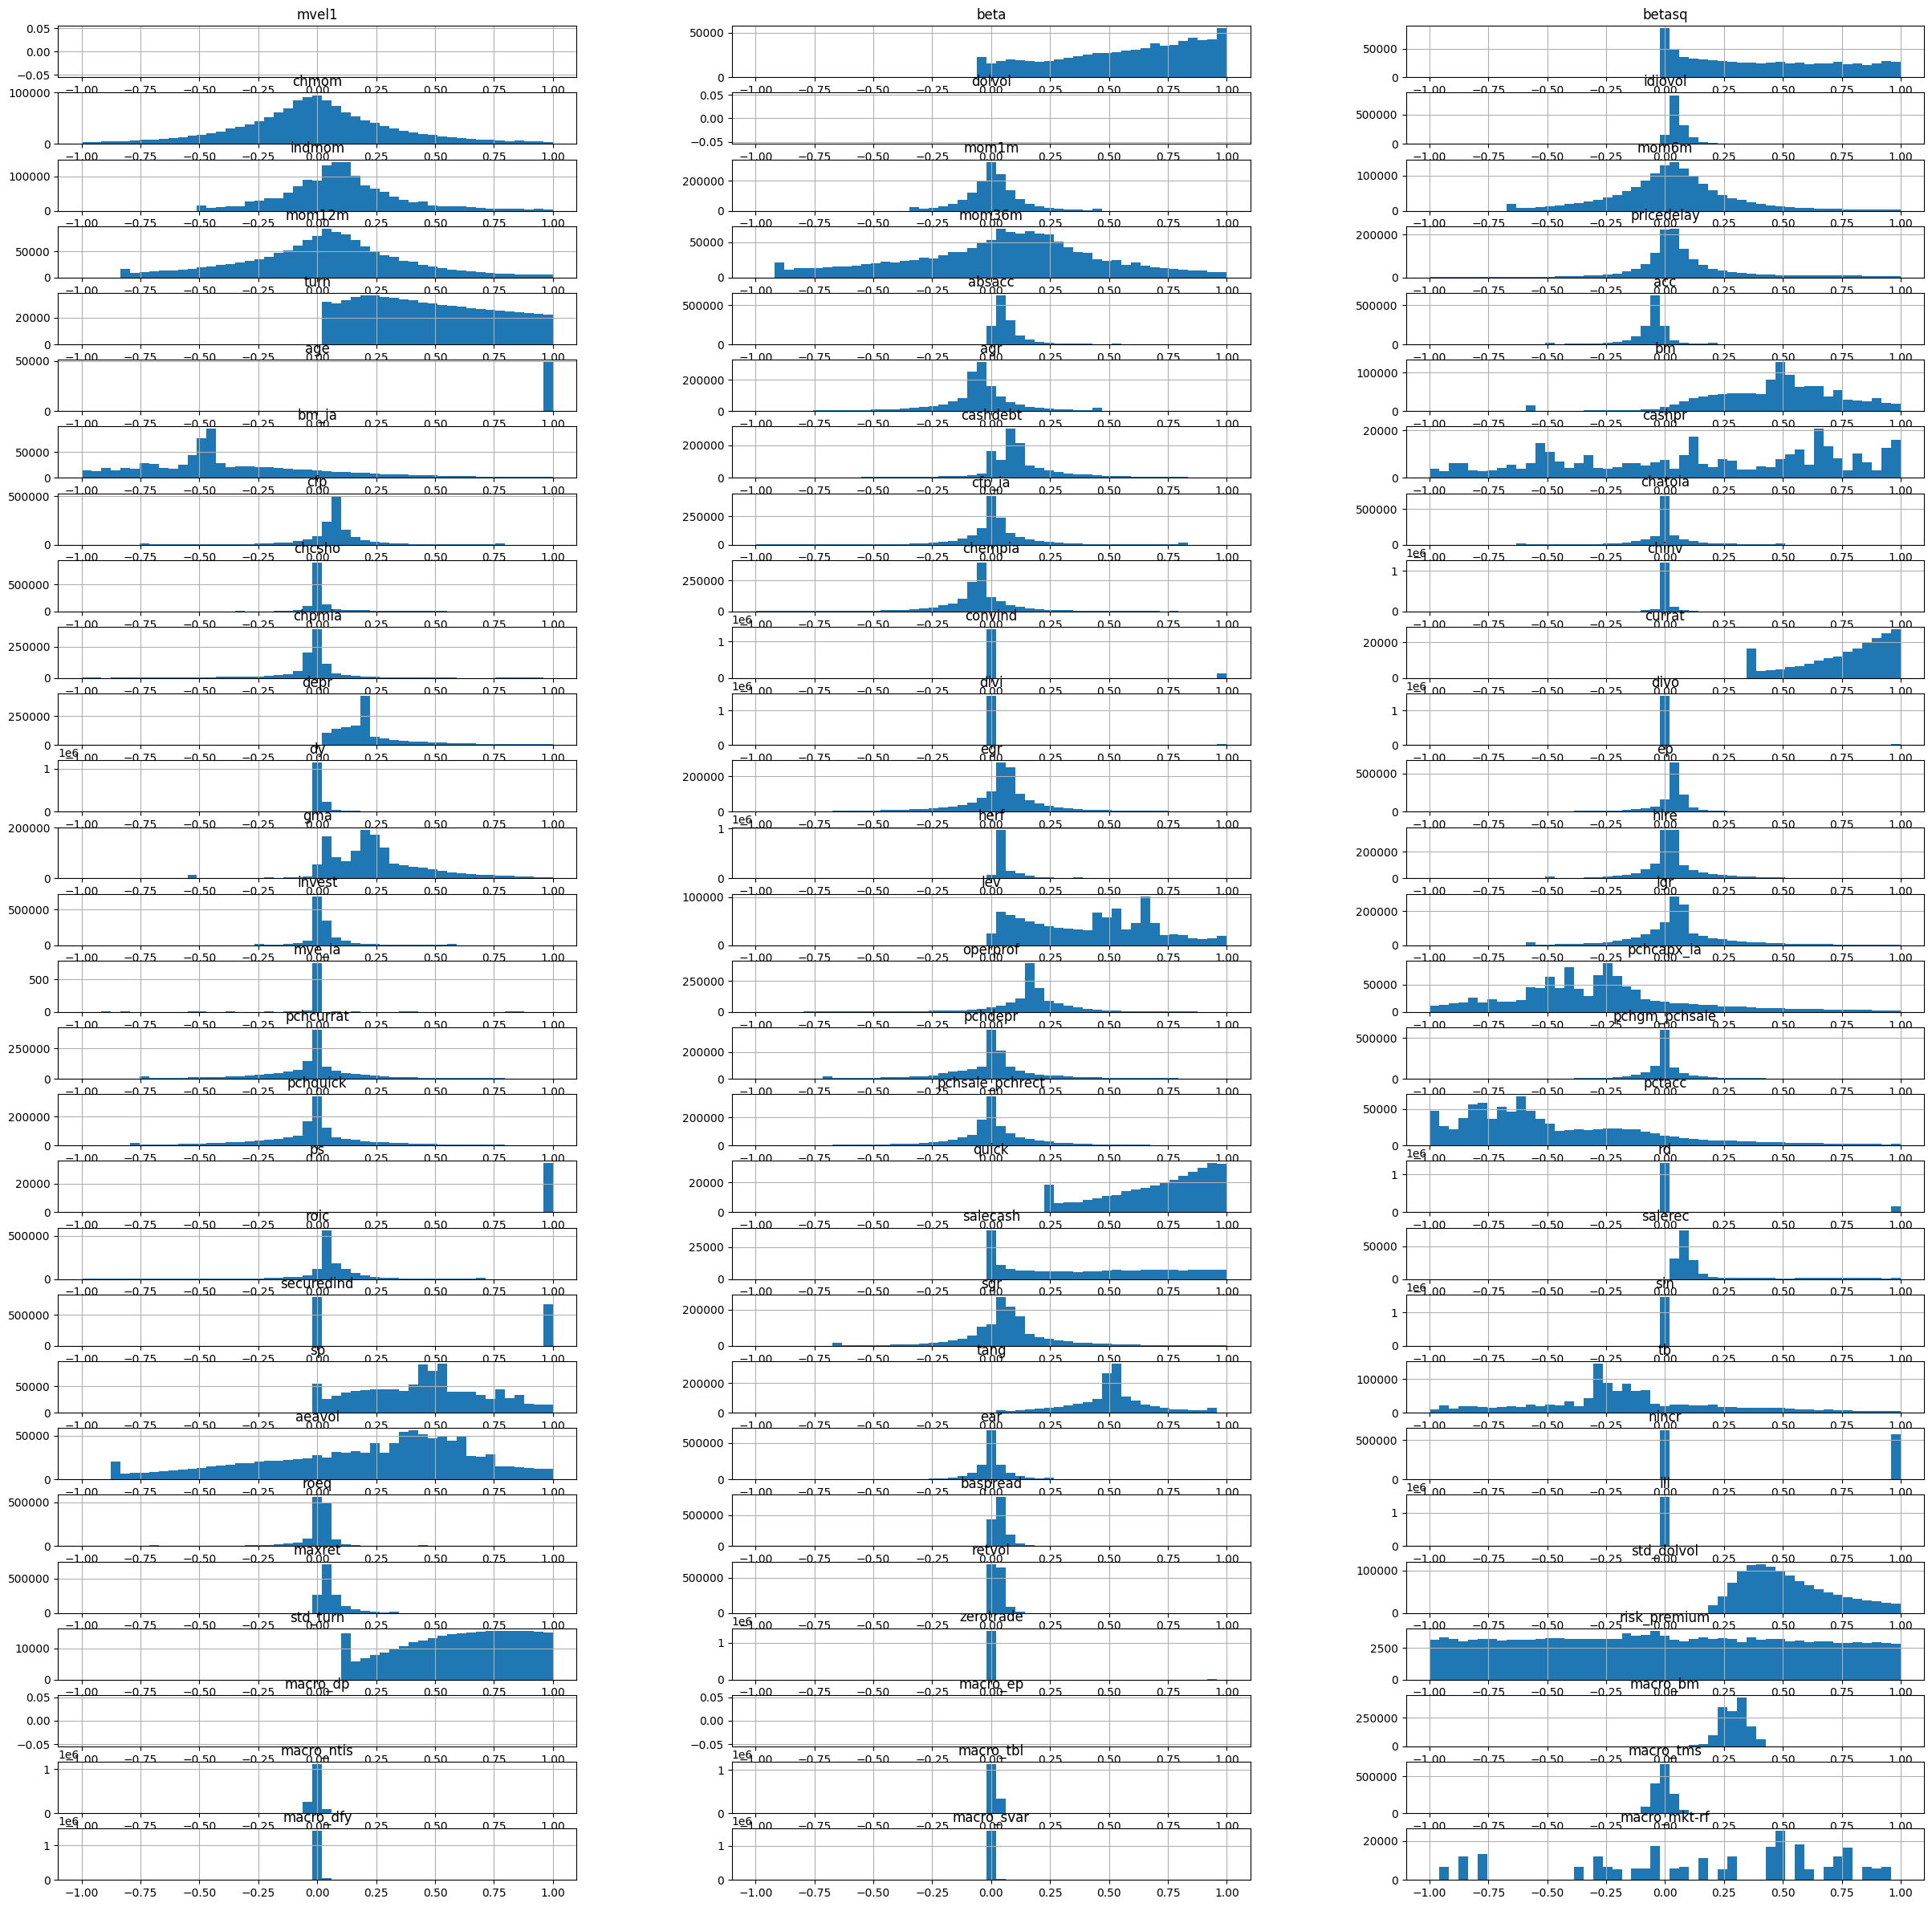

In [19]:
fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
df[features].hist(layout=(-1, 3), bins=np.linspace(-1,1,50), ax=ax)

C:\Users\drebi\AppData\Local\Temp\ipykernel_20968\1896567471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_data["eq_weights"] = 1/risk_data.groupby('DATE')['permno'].transform('size')
C:\Users\drebi\AppData\Local\Temp\ipykernel_20968\1896567471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_data['premium_stock_ew'] = risk_data['risk_premium'] * risk_data['eq_weights']
C:\Users\drebi\AppData\Local\Temp\ipykernel_20968\1896567471.py:5: SettingWithCopyWarning: 
A value is trying to be set 

<Axes: xlabel='DATE'>

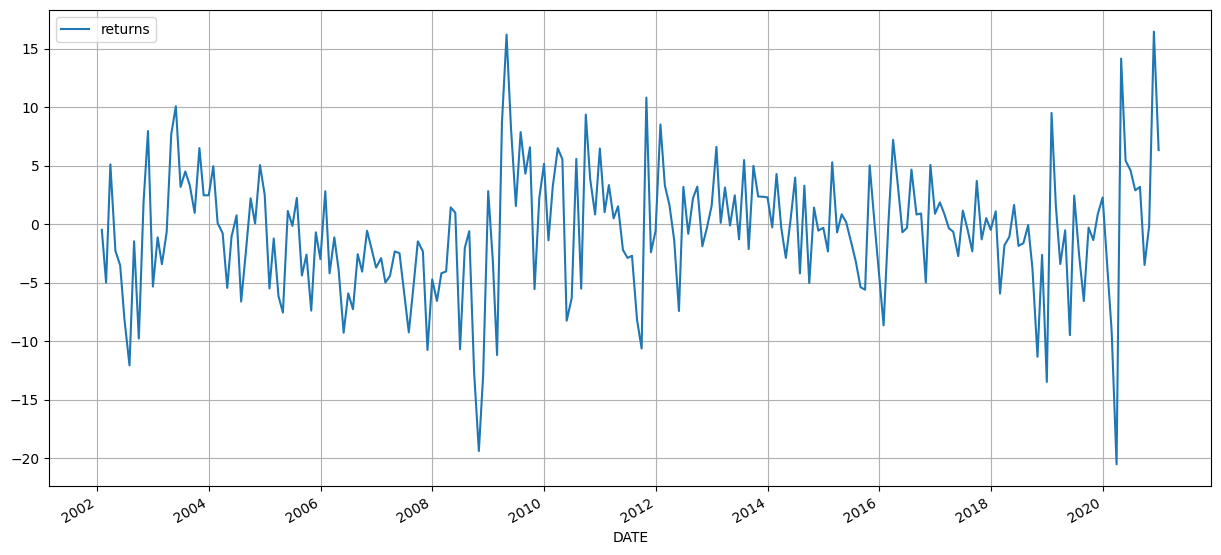

In [28]:
risk_data = df2[["risk_premium", "permno", "DATE"]]
#create equal weights
risk_data["eq_weights"] = 1/risk_data.groupby('DATE')['permno'].transform('size')
risk_data['premium_stock_ew'] = risk_data['risk_premium'] * risk_data['eq_weights']
risk_data['returns'] = risk_data.groupby('DATE')['premium_stock_ew'].transform('sum')

risk_data = risk_data[['DATE', 'returns']].drop_duplicates()
risk_data = risk_data.set_index('DATE')

risk_data.plot(grid=True, figsize=(15, 7))


<Axes: xlabel='mvel1', ylabel='Count'>

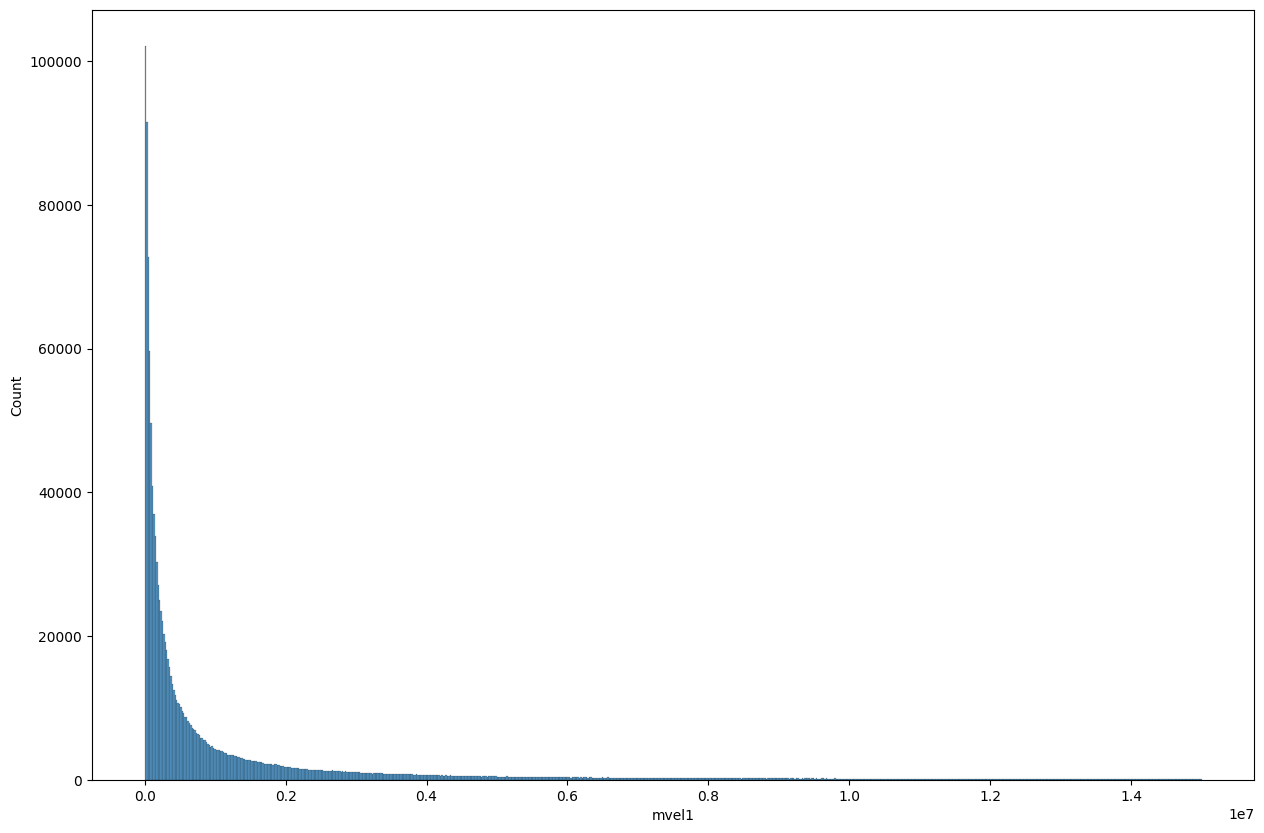

In [36]:
rcParams['figure.figsize'] = 15, 10
sns.histplot(data = df2, x='mvel1', binrange = (0, 15000000))

Text(0.5, 1.0, 'Correlation Heatmap')

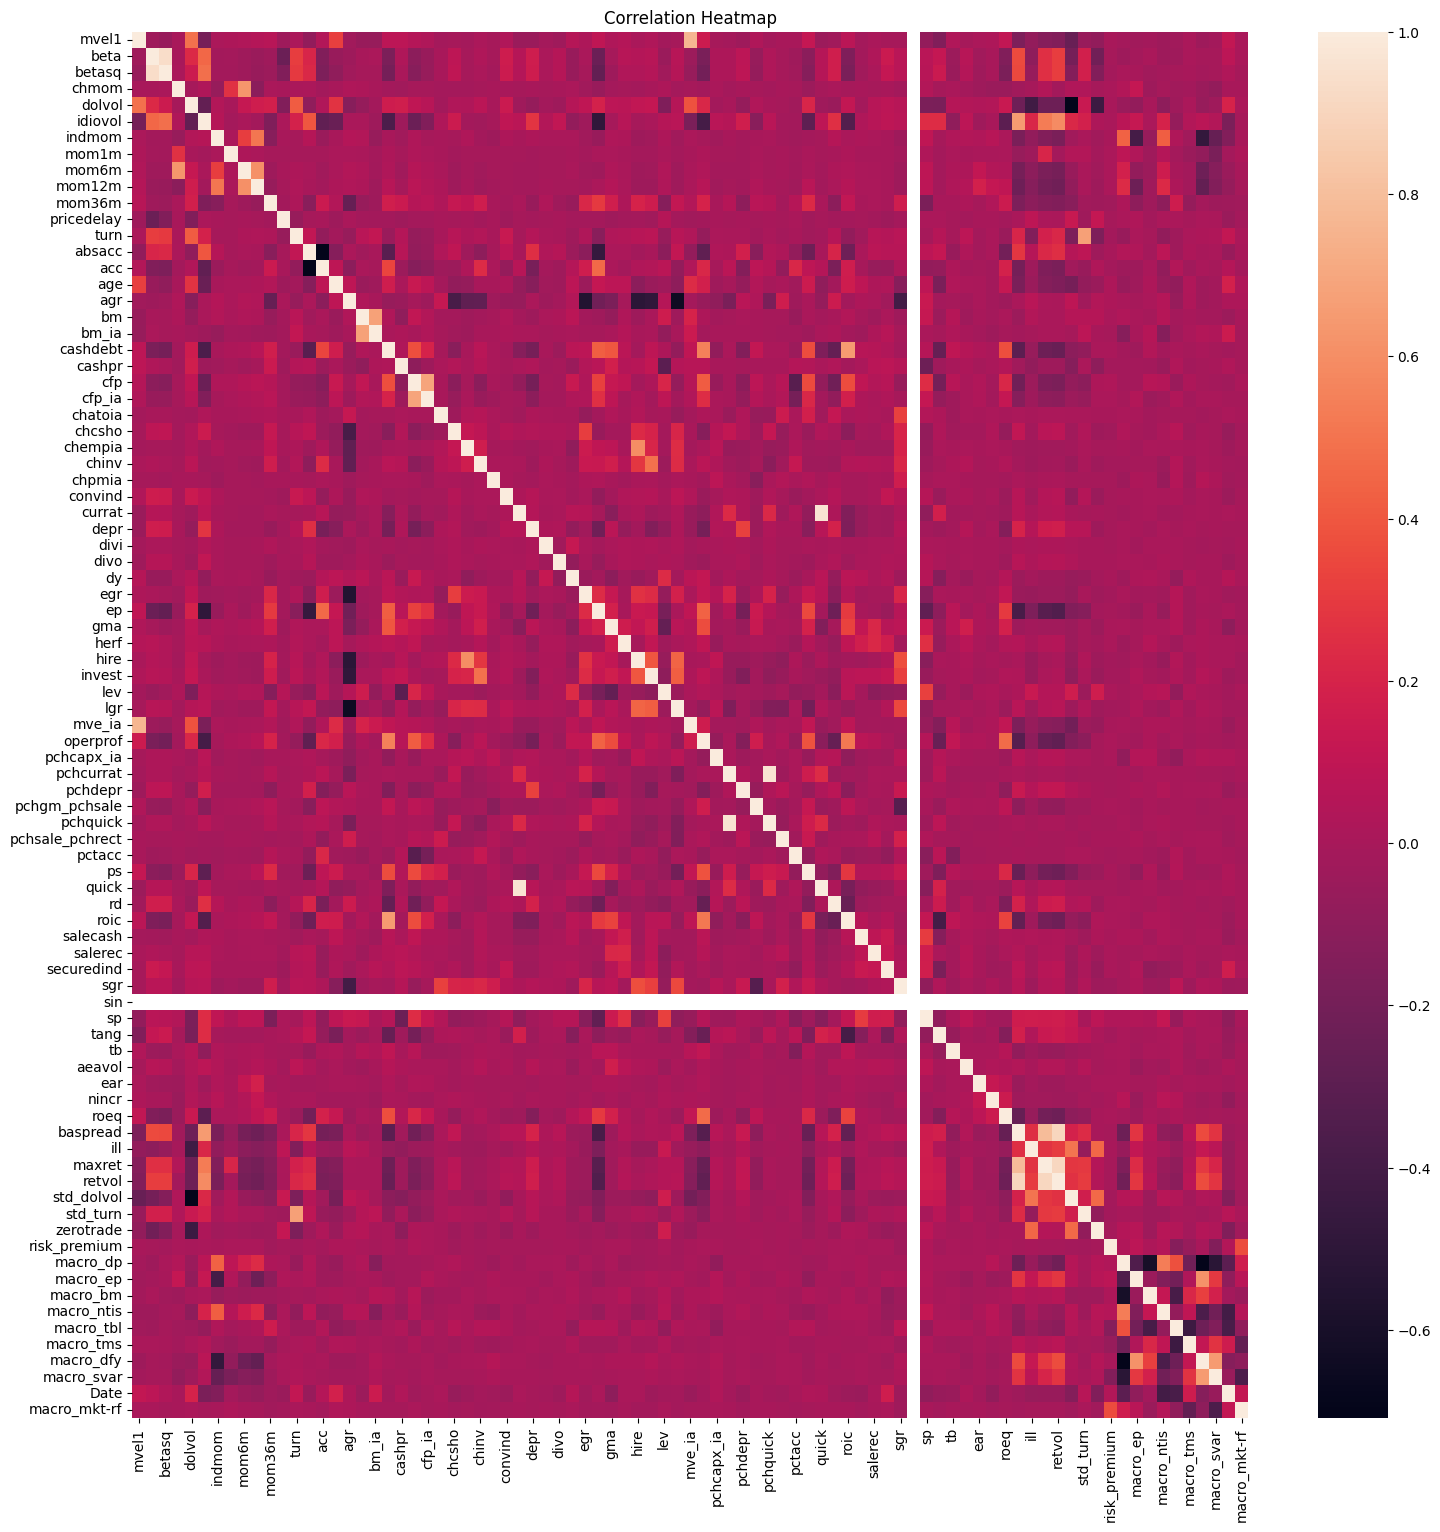

In [38]:
features = df.columns[~df.columns.isin(['permno', 'DATE'])].tolist()
plt.figure(figsize=(18,18))
sns.heatmap(df2[features].corr())
plt.title('Correlation Heatmap')

In [40]:
pd.set_option('display.max_rows', None)
c = df2[features].corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort').reset_index()
so.columns = ['Variable 1', 'Variable 2', 'corr']
so = so.sort_values(by= ['corr', 'Variable 1'], ascending=False)
so = so[so['corr'] != 1]
so = so.iloc[::2].reset_index(drop=True)
so

,Variable 1,Variable 2,corr
0,quick,currat,0.966122
1,pchquick,pchcurrat,0.963380
2,betasq,beta,0.935670
3,retvol,maxret,0.909645
4,retvol,baspread,0.902311
5,maxret,baspread,0.787891
6,mvel1,mve_ia,0.763958
7,acc,absacc,0.708407
8,std_dolvol,dolvol,0.700475
9,macro_dp,macro_dfy,0.697708
